# Vodafone Customer churn prediction

#### **Business Undestanding**

##### **Problem statements**:

Vodafone is currently facing a substantial challenge with customer churn, which negatively impacts its revenue and operational efficiency. The existing approaches to manage churn are predominantly reactive and lack the precision to effectively identify customers at risk of leaving. This inability to predict churn accurately hinders Vodafone's efforts to implement timely and effective retention strategies, resulting in increased costs associated with acquiring new customers and managing churn.

##### **Project Goal and Objectives**:

**Goal:**
Develop a robust machine learning model to accurately predict customer churn at Vodafone, enabling the company to implement preemptive retention strategies and reduce the overall churn rate.

**Objectives:**

1. **Data Analysis:** Conduct a thorough analysis of customer data to identify patterns and factors contributing to churn, including demographics, usage patterns, service quality, and customer support interactions.
2. **Feature Engineering:** Create meaningful features from raw data to improve the predictive power of the churn model.
3. **Model Development:** Build and evaluate various machine learning models to predict customer churn, selecting the best-performing model based on accuracy, precision, recall, and other relevant metrics.
4. **Model Evaluation:** Rigorously assess the performance of the models using appropriate validation techniques and metrics to ensure robustness and reliability.
5. **Actionable Insights:** Provide actionable insights and recommendations based on the model’s predictions to help Vodafone develop targeted retention campaigns and improve customer satisfaction.

##### **Stakeholder**

1. **Customer Retention Team**:
   **Role**: Implement retention strategies based on the model's predictions.

2. **Marketing Team**:
   **Role**: Develop and execute marketing strategies to enhance customer loyalty.
3. **Customer Service Team**:
   **Role**: Address customer concerns and improve service quality.
4. **Data Science and Analytics Team**:
   **Role**: Develop, refine, and validate the churn prediction model.
5. **Vodafone Senior Management**:
   **Role**: Make strategic decisions based on model insights.

These stakeholders will actively use the model to drive decisions and actions that enhance customer retention and loyalty, ultimately contributing to Vodafone's overall business success.

##### **Key Metrics and Success Criteria**

1. **Accuracy**: Proportion of correct predictions.
   **Target**: ≥ 85% (Balanced data)

2. **F1 Score**:
   **Definition**: Harmonic mean of precision and recall.
   **Target**: ≥ 80%.

3. **AUC-ROC**: Discriminative power of the model.
   **Target**: ≥ 0.80.

4. At least 4 baseline models
5. All hyperparameter uning should be only to basedline model if they excedd there F1 score

##### **Features**

There are 17 categorical features:

- CustomerID : Unique identifier for each customer.
- Gender : Gender of the customer (Male, Female).
- SeniorCitizen : Indicates if the customer is a senior citizen (1: Yes, 0: No).
- Partner : Indicates if the customer has a partner (Yes, No).
- Dependents : Indicates if the customer has dependents (Yes, No).
- PhoneService : Indicates if the customer has a phone service (Yes, No).
- MultipleLines : Indicates if the customer has multiple lines (Yes, No, No phone service).
- InternetService : Type of internet service the customer has (DSL, Fiber optic, No).
- OnlineSecurity : Indicates if the customer has online security service (Yes, No, No internet service).
- OnlineBackup : Indicates if the customer has an online backup service (Yes, No, No internet service).
- DeviceProtection : Indicates if the customer has device protection service (Yes, No, No internet service).
- TechSupport : Indicates if the customer has tech support service (Yes, No, No internet service).
- StreamingTV : Indicates if the customer streams TV (Yes, No, No internet service).
- StreamingMovies : Indicates if the customer streams movies (Yes, No, No internet service).
- Contract : The contract term of the customer (Month-to-month, One year, Two years).
- PaperlessBilling: Indicates if the customer uses paperless billing (True, False).
- PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

Next, there are 3 numerical features:

- Tenure: Number of months the customer has stayed with the company
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer

Finally, there’s a prediction feature:

- Churn: Whether the customer churned or not (Yes or No)

##### ** Hypotheses**

**Hypothesis 1: Contract Type**
The type of contract a customer has is a strong indicator of their commitment to the service. Customers on month-to-month contracts might be more prone to churn compared to those with longer-term contracts.

** Null Hypothesis (H0):**
The contract term (Month-to-month, One year, Two years) has no effect on the likelihood of customer churn.

**Alternative Hypothesis (H1):**
The contract term (Month-to-month, One year, Two years) has a significant effect on the likelihood of customer churn.

**Hypothesis 2: Monthly Charges**
Higher monthly charges might lead to dissatisfaction among customers, especially if they do not perceive a corresponding value in the service, leading to higher churn rates.

**Null Hypothesis (H0):**
Monthly charges have no effect on the likelihood of customer churn.

**Alternative Hypothesis (H1):**
Monthly charges have a significant effect on the likelihood of customer churn.

**Hypothesis 3: Internet Service**
The type of internet service can impact customer satisfaction. For example, customers using fiber optic might be less likely to churn due to higher satisfaction with faster internet speeds compared to DSL or no internet service.

**Null Hypothesis (H0):**
The type of internet service (DSL, Fiber optic, No) has no effect on the likelihood of customer churn.

**Alternative Hypothesis (H1):**
The type of internet service (DSL, Fiber optic, No) has a significant effect on the likelihood of customer churn.

#### Analtytics Questions

1. Overall Churn Rate:

   What is the overall churn rate in the dataset?

2. Contract Type and Churn:

   What is the distribution of contract types among customers?
   How does the contract type affect the churn rate?

3. Tenure and Churn:

4. What is the distribution of tenure among customers?
   How does tenure affect the churn rate?
5. Monthly Charges and Churn:

   What is the distribution of monthly charges among customers?
   How do monthly charges affect the churn rate?

6. Payment Method and Churn:

   What are the different payment methods used by customers?
   How does the payment method affect the churn rate?

7. Internet Service and Churn:

   What types of internet services are customers using?
   How does the type of internet service affect the churn rate?

Additional Services and Churn (Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies):

How does the usage of these additional services affect the churn rate?
Senior Citizens and Churn:

What percentage of customers are senior citizens?
How does the churn rate compare between senior citizens and non-senior citizens?
Partners and Churn:

How many customers have partners?
Is there a significant difference in churn rates between customers with and without partners?
Dependents and Churn:

How many customers have dependents?
How does the presence of dependents affect the churn rate?


### Data Undestanding


#### Data Importation


In [22]:
# data manipulation packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dattabase conection packages
import pyodbc  
from sqlalchemy import create_engine    
from dotenv import dotenv_values

import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install pyodbc, python-dotenv


#### load datasets


In [3]:
# database data
environment_variables = dotenv_values('..\.env')

server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
connection = pyodbc.connect(connection_string)

In [9]:
# SQL query to fetch data from 'dbo.LP2_Telco_churn_first_3000' table
query = "Select * from dbo.LP2_Telco_churn_first_3000"

# Read data from the SQL query result
LP2_Telco_churn_first_3000 = pd.read_sql(query, connection)
LP2_Telco_churn_first_3000.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1464,4283-IVYCI,Male,False,False,False,9,True,False,DSL,True,...,False,True,False,True,Month-to-month,False,Mailed check,64.949997,547.799988,False
2685,5781-BKHOP,Female,False,True,False,72,True,True,Fiber optic,True,...,True,False,True,False,Two year,False,Bank transfer (automatic),100.650002,7334.049805,False
1052,7013-PSXHK,Female,False,False,False,40,True,True,DSL,False,...,True,True,True,True,One year,True,Mailed check,80.750000,3208.649902,False
1913,7188-CBBBA,Female,False,False,False,65,True,True,Fiber optic,False,...,True,False,True,False,One year,True,Electronic check,95.500000,6153.850098,False
2773,2770-NSVDG,Male,False,True,False,24,False,None,DSL,False,...,True,False,False,False,Month-to-month,False,Electronic check,29.100000,688.000000,False


In [10]:
# importing the second dataset
LP2_Telco_churn_second = pd.read_csv('..\data\LP2_Telco-churn-second-2000.csv')
LP2_Telco_churn_second.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


#### Exploratory data analysis(EDA)


In [11]:
# Concatenate the first and second dataset
df = pd.concat([LP2_Telco_churn_first_3000, LP2_Telco_churn_second], ignore_index=True)

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
494,6579-JPICP,Male,0,False,False,1,True,False,No,None,...,None,None,None,None,Month-to-month,False,Mailed check,20.400000,20.4,False
914,6024-RUGGH,Male,0,True,True,72,True,True,No,None,...,None,None,None,None,Two year,True,Bank transfer (automatic),25.200001,1798.900024,False
4424,6034-ZRYCV,Female,0,Yes,No,72,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,54.200000,3937.45,Yes
3143,5204-HMGYF,Female,0,Yes,Yes,49,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,87.200000,4345,No
1978,0602-DDUML,Female,0,False,False,57,True,False,DSL,False,...,True,True,True,False,Two year,False,Mailed check,69.750000,3894.399902,False
4379,0940-OUQEC,Male,0,No,No,10,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.700000,788.8,Yes
2021,0181-RITDD,Male,0,True,True,62,True,False,Fiber optic,True,...,True,True,True,True,Two year,False,Mailed check,108.150002,6825.649902,False
3204,4282-ACRXS,Male,1,Yes,No,38,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.850000,955.75,No
294,1563-IWQEX,Female,0,False,False,12,True,False,No,None,...,None,None,None,None,Month-to-month,False,Mailed check,19.700001,220.350006,False
1014,4695-VADHF,Male,0,True,True,18,True,False,DSL,False,...,True,False,False,True,Month-to-month,False,Electronic check,57.450001,990.849976,True


- data quality Assessment and Exploratory


In [12]:
# info, duplicates, null values and describe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [15]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [31]:
df.describe(include= 'object').T

,count,unique,top,freq
customerID,5043,5043,3186-AJIEK,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


- Key insights

1. Total Records: The dataset contains a total of 5043 entries.
2. Columns with Missing Values: MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies
   TotalCharges has 5 missing values.
   Churn has 1 missing value.
3. Data Types:Most columns are of type object, indicating categorical data.
   SeniorCitizen and tenure are int64 (integer).
   MonthlyCharges is float64 (floating point).
   TotalCharges is currently of type object, but should be float.
   Churn is object but should be converted to numerical (e.g., 0 and 1)
4. NO duplicated found


In [34]:
def check_unique_values(data):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique value(s):")
        print(unique_values)
        print("\n" + "-"*50 + "\n")
check_unique_values(df)

Column 'customerID' has 5043 unique value(s):
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

--------------------------------------------------

Column 'gender' has 2 unique value(s):
['Female' 'Male']

--------------------------------------------------

Column 'SeniorCitizen' has 2 unique value(s):
[0 1]

--------------------------------------------------

Column 'Partner' has 4 unique value(s):
[True False 'No' 'Yes']

--------------------------------------------------

Column 'Dependents' has 4 unique value(s):
[False True 'No' 'Yes']

--------------------------------------------------

Column 'tenure' has 73 unique value(s):
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

--------------------------------------------------

Column 'PhoneService' has 4 unique value(s):
[F

Certainly! Here’s the rephrased version:

**Identified Issues:**

- Many columns contain synonymous values (e.g., the `Partner` column has both 'False' and 'No' to represent the same concept).
- The values in the `MonthlyCharges` and `TotalCharges` columns should have a consistent number of decimal places.
- The `TotalCharges` column should be converted to the float data type.


- Univariate


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

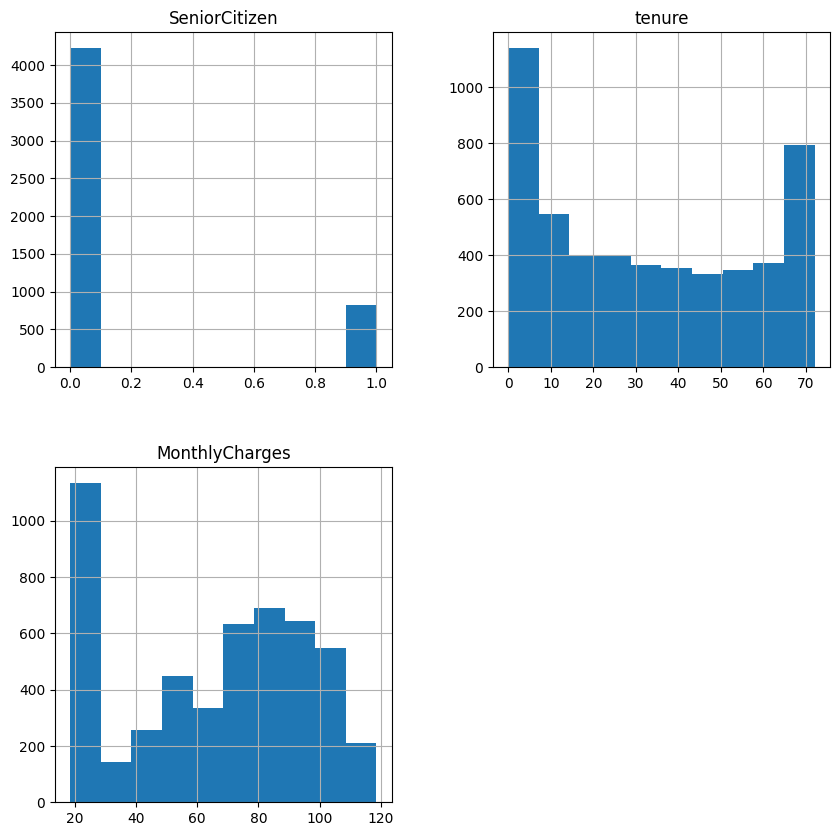

In [36]:
df.hist(figsize=(10, 10))

- Bi-variate


- Multi-variable analysis


#### key insights


### Data Preparation


### Modeling and Evaluation


### Deployment

Not Applicable
